In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [155]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### 머신러닝 모델 평가
* 일반적으로 머신러닝은
    + 데이터가공/변환(전처리), 모델 학습/예측 평가과정을 거침
* 03titanic 분석에서 모델의 평가는 정확도만 사용함
* 한편, 머신러닝의 예측성능 평가방법은
     + 회귀 : R^2, MSE평균제곱오차
     + 분류 : 오차행렬, 정밀도/재현율, ROC, AUC, F1스코어, 크로스엔트로피, 최대우도

### 정확도의 함정
* 탐색적 분석 시행시 성별 기준 생존비율은 여성이 더 높음
* 따라서, 굳이 ML알고리즘을 적용하지 않아도 성별에 따른 생존여부 예측에 큰 무리가 없음
* 성별 조건만으로 이루어진 단순한 알고리즘으로 높은 정확도 기록 가능

### BaseEstimator 클래스를 상속받아 가짜분류기 생성


In [21]:
from sklearn.base import BaseEstimator

In [37]:
class DummyClassifier(BaseEstimator):
    # 아무것도 학습하지 않는 fit 메서드 정의
    def fit(self, X, y=None):
        pass
    def predict(self, X):
    # 입력데이터 크기만큼 0으로 채워진 1차원 행렬 생성
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
        # 성별이 여성이면 무조건 생존이라 예측
            if X['sex'].iloc[i] != 1:
                pred[i] = 1
        return pred

#### 성별이 1(남자)이면 사망(0), 2(여자)이면 생존(1)로 예측하는 predict 메서드 정의

In [32]:
titanic = pd.read_csv('data/titanic.csv')

In [33]:
titanic['sex'] = titanic['sex'].apply(lambda x: 0 if x == 'female' else 1)

In [34]:
data = titanic.iloc[:, [0, 3, 4, 5, 6, 8]]
target = titanic.survived

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, train_size=0.7, random_state=2111041205)

In [36]:
myclf = DummyClassifier()
myclf.fit(Xtrain, ytrain)
pred = myclf.predict(Xtest)
accuracy_score(pred,ytest)

0.798469387755102

### 불균형한 레이블 데이터세트의 성능수치로 정확도를 평가지표로 사용해선 안 됨
+ 이러한 한계 극복을 위해 오차행렬 사용
+ 특히 분류모델에서는 정확도보다 정밀도/재현율을 더 선호

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
confusion_matrix(pred, ytest)

array([[202,  36],
       [ 43, 111]])

In [42]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.84       238
         1.0       0.76      0.72      0.74       154

    accuracy                           0.80       392
   macro avg       0.79      0.78      0.79       392
weighted avg       0.80      0.80      0.80       392



In [44]:
from sklearn.datasets import load_iris

In [67]:
iris = load_iris()
data = iris.data  # 특성/독립변수
label = iris.target

In [68]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [69]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [112]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data, label, train_size=0.7, stratify=label, random_state=2111041255)

In [113]:
lrclf = LogisticRegression()
lrclf.fit(Xtrain, ytrain)
pred = lrclf.predict(Xtest)
accuracy_score(pred,ytest)

0.9777777777777777

In [114]:
confusion_matrix(pred, ytest)

array([[15,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 15]])

In [84]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.97        14
           2       1.00      0.94      0.97        16

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### 정확도
+ 맞는 것을 맞다고, 틀린것을 틀리다고 올바르게 예측한 것
+ $ accuracy = \frac {TP + TN} {TP + TN + FP + FN} $
+ 오차행렬에서 대각선 방향

### 타이타닉 분석결과의 오차행렬에서 정확도 계산

In [85]:
(202 +111) / (202 + 36 + 43 + 111)

0.798469387755102

### 정밀도 
+ 모델의 예측값이 얼마나 올바른지 알아보는 지표
+ 양성으로 예측한 것 중에서 실제로 양성인 것은 얼마나 존재하는가
+ $ precision = \frac {TP} {TP + FP} $

### 타이타닉 분석결과의 오차행렬에서 정밀도 계산

In [87]:
202 / (202 + 43)

0.8244897959183674

In [ ]:
# 6마리의 동물형상 중 개p/고양이n를 맞추는 게임을 진행
# 정답 = [개     개     개 고양이 개     고양이]
# 예측 = [개     고양이 개 고양이 개     개    ]

In [89]:
ans = ['p', 'p', 'p', 'n', 'p', 'n']
pre = ['p', 'n', 'p', 'n', 'p', 'p']

In [92]:
confusion_matrix(ans, pre)

array([[1, 1],
       [1, 3]])

### 재현율
+ 양성 중 양성 예측 비율
+ 실제 양성 예측율
+ 민감도 또는 적중률 hit rate
+ $ recall = \frac {TP} {TP + FN} $

### 정밀도/재현율의 trade-off
+ 분류 대상 업무의 특성상 정밀도 또는 재현율이 특별히 강조되어야 하는 경우(특히 임상의료) 결정 임계값을 조정하면 정밀도 또는 재현율을 높일 수 있음
    - 이진분류에서 0 또는 1로 판정할 기준값을 의미
    - 임계값을 0.5로 정하는 경우 기준값보다 확률이 크면 positive, 작으면 negative로 결정
+ 한편, 정밀도와 재현율은 상호보완적인 지표이기때문에 어느 한쪽을 올리면 다른 한쪽은 떨어지는 관계를 뜀

### F1 스코어
+ 데이터의 레이블이 불균형 구조일때 모델의 성능을 정확하게 평가하기 위한 지표
+ 정밀도와 재현율은 분류모델의 성능을 평가하는 데 중요한 지표
+ F1은 둘을 하나의 수치로 정리해서 나타낸 지표 - 정밀도와 재현율의 조화평균
### $ F1score = 2*\frac {Precision * recall} {precision + recall} $

+ 어느 한쪽으로 치우치지 않는 수치를 나타낼때 상대적으로 높은 값을 가짐

+ 예를 들어, 예측모델 A의 정밀도와 재현율이 0.9/0.1이고, 예측모델 B의 정밀도와 재현율이 0.55/0.45일때 각각의 F1스코어는 0.18/0.495이다

+ 따라서, 모델 B가 모델 A보다 우수하다

### wine 데이터셋 : 178개의 와인샘플을 13개의 화학성분에 근거해 3가지 등급으로 분류
+ wine을 logistic regression으로 분석하고 오차행렬, 정밀도/재현율, f1스코어 확인하기

In [94]:
from sklearn.datasets import load_wine

In [97]:
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [100]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [102]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [122]:
wine.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [125]:
pd.Series(wine.target).value_counts() # 종속 변수값 분포

1    71
0    59
2    48
dtype: int64

In [140]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, train_size=0.7, stratify=wine.target, random_state=2111040402)

In [141]:
lrclfw = LogisticRegression(max_iter =2500)
lrclfw.fit(Xtrain, ytrain)
pred = lrclfw.predict(Xtest)
accuracy_score(pred,ytest)

0.9074074074074074

In [142]:
confusion_matrix(pred, ytest)

array([[16,  1,  0],
       [ 2, 19,  1],
       [ 0,  1, 14]])

### wine 데이터셋을 dataframe으로 생성

In [128]:
wines = pd.DataFrame(wine.data)
wines.columns = wine.feature_names
wines.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [129]:
wines['class'] = wine.target

In [135]:
wines.tail(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750.0,2
169,13.40,4.60,2.86,25.0,112.0,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630.0,2
170,12.20,3.03,2.32,19.0,96.0,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510.0,2
171,12.77,2.39,2.28,19.5,86.0,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470.0,2
172,14.16,2.51,2.48,20.0,91.0,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660.0,2
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560.0,2


In [131]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

### 데이터를 train/test로 나눔

In [143]:
Xtrain, Xtest, ytrain, ytest = train_test_split(wine.data, wine.target, train_size=0.7,  stratify=wine.target, random_state=2111041645)

#### max_iter : 적절한 해를 찾기 위한 탐색횟수 지정

In [161]:
lrclfww = LogisticRegression(max_iter=2500)
lrclfww.fit(Xtrain, ytrain)
pred = lrclfww.predict(Xtest)
accuracy_score(pred,ytest)

0.9444444444444444

In [162]:
confusion_matrix(pred, ytest)

array([[17,  0,  0],
       [ 1, 20,  1],
       [ 0,  1, 14]])

In [163]:

print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.95      0.91      0.93        22
           2       0.93      0.93      0.93        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54



In [164]:
rfclfww = LogisticRegression(max_iter=2500)
rfclfww.fit(Xtrain, ytrain)
pred = rfclfww.predict(Xtest)
accuracy_score(pred,ytest)

0.9444444444444444

In [165]:
confusion_matrix(pred, ytest)

array([[17,  0,  0],
       [ 1, 20,  1],
       [ 0,  1, 14]])

In [166]:
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.95      0.91      0.93        22
           2       0.93      0.93      0.93        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.94      0.94      0.94        54



### 적절한 변수선택을 통한 분석 방법
+ SequentialFeatureSelector 를 이용해서 적절한 변수의 숫자와 그 정확도 알아보기


In [167]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:

lrclfwww.fit(Xtrain, ytrain)
pred = lrclfwww.predict(Xtest)
accuracy_score(pred,ytest)

In [174]:
scores = []
# lrclfwww = LogisticRegression(max_iter=2500)
knn = KNeighborsClassifier()
for n in range(1, 13):
    sfs = SequentialFeatureSelector(knn, n_features_to_select=n, n_jobs=-1)
    sfs.fit(Xtrain, ytrain)
    mask = sfs.support_
    knn.fit(Xtrain[:, mask], ytrain)
    scores.append(knn.score(Xtrain[:, mask], ytrain))

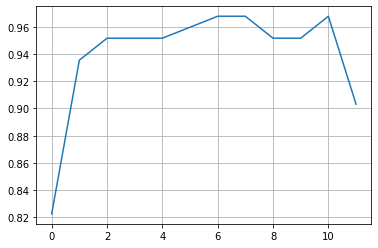

In [176]:
plt.plot(scores)
plt.grid()

### 종속변수가 6~7일때 정확도가 좋음

In [182]:
sfs = SequentialFeatureSelector(knn, n_features_to_select=7, n_jobs=-1)
sfs.fit(Xtrain, ytrain)
mask = sfs.support_
knn.fit(Xtrain[:, mask], ytrain)
knn.score(Xtrain[:, mask], ytrain)

0.967741935483871

### 최적의 정확도 출력시 사용한 컬럼들

In [183]:
wines.columns[1:][mask] 

Index(['ash', 'alcalinity_of_ash', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue'],
      dtype='object')